<a href="https://colab.research.google.com/github/CEMPAplicaciones/MIA/blob/main/Modulo_2/2_3_4_Modelado_y_evaluaci%C3%B3n_de_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelado y m√©tricas de desempe√±o

In [2]:
# Importar las librer√≠as necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console
console = Console()

# Configuraci√≥n para visualizaciones
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")

In [3]:
# Vamos a trabajar con el conjuto de datos de diabetes de Scikit-learn
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convertir el objetivo en un problema de clasificaci√≥n binaria
# Consideraremos que un valor por encima de la mediana es "diabetes positivo"
y_binary = (y > np.median(y)).astype(int)

# Crear un DataFrame con nombres de caracter√≠sticas
feature_names = diabetes.feature_names
data = pd.DataFrame(X, columns=feature_names)
data['diabetes'] = y_binary

üìä Generando 10 boxplots en dise√±o 5x2


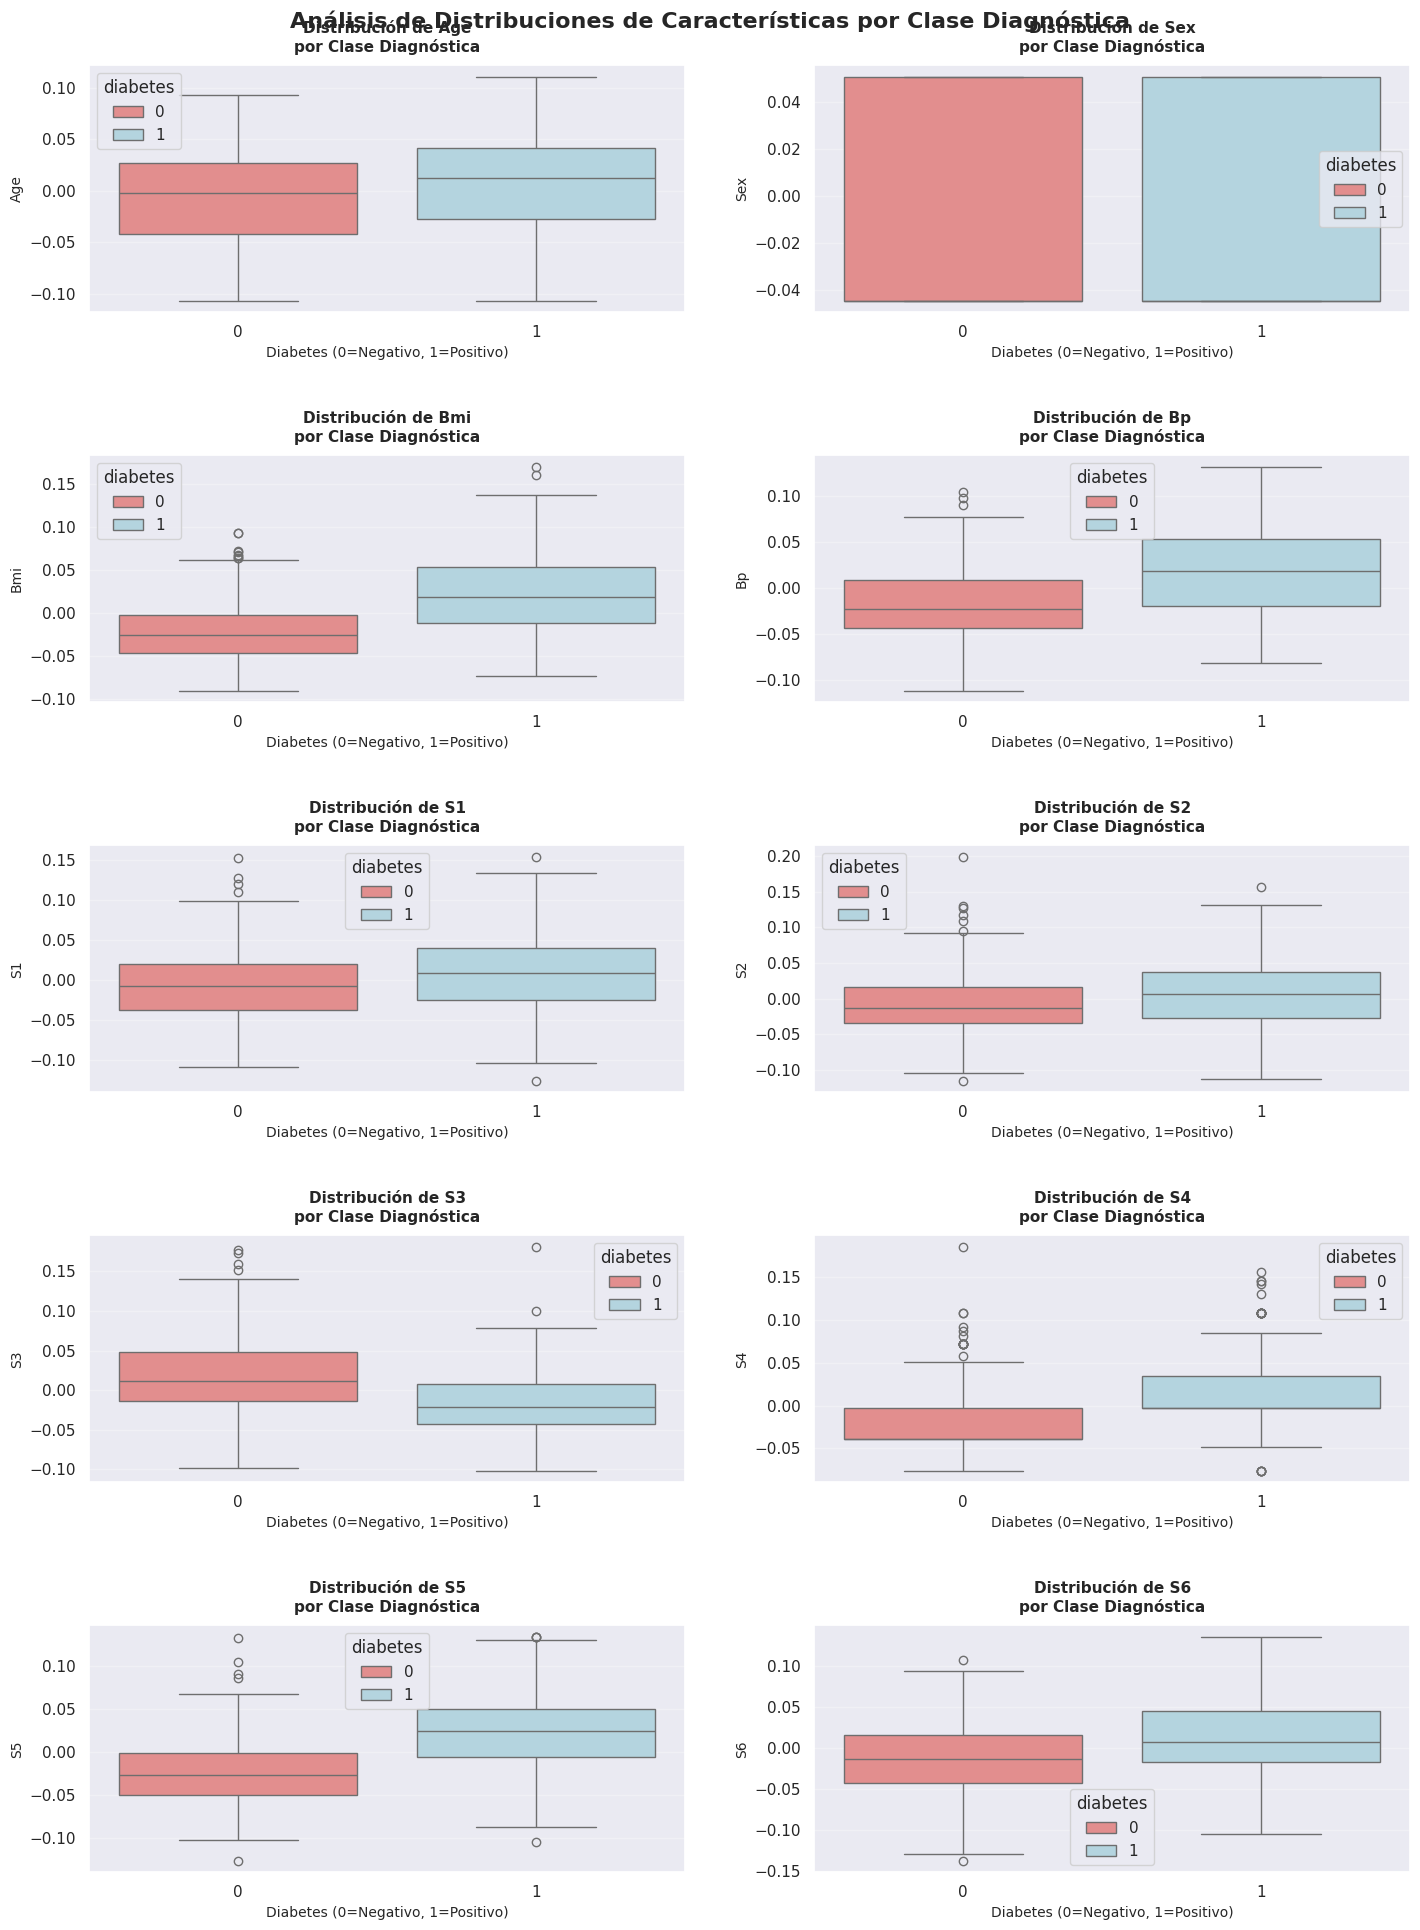

In [6]:
# Crear una figura con subplots para los boxplots
plt.figure(figsize=(15, 20))

# Configuraci√≥n del dise√±o de subplots
n_features = len(feature_names)
rows = (n_features + 1) // 2  # Calcular n√∫mero de filas necesarias
cols = 2

print(f"üìä Generando {n_features} boxplots en dise√±o {rows}x{cols}")

# Crear boxplots para cada caracter√≠stica
for i, feature in enumerate(feature_names, 1):
    plt.subplot(rows, cols, i)

    # Generar boxplot con paleta de colores mejorada
    sns.boxplot(x='diabetes', y=feature, data=data,
                palette=['lightcoral', 'lightblue'],
                hue='diabetes',
                showfliers=True)

    # Personalizar t√≠tulo y etiquetas
    plt.title(f'Distribuci√≥n de {feature.replace("_", " ").title()}\npor Clase Diagn√≥stica',
              fontsize=11, fontweight='bold', pad=10)
    plt.xlabel('Diabetes (0=Negativo, 1=Positivo)', fontsize=10)
    plt.ylabel(f'{feature.replace("_", " ").title()}', fontsize=10)

    # A√±adir grilla sutil para mejor legibilidad
    plt.grid(True, alpha=0.3, axis='y')

# Ajustar espaciado entre subplots y a√±adir t√≠tulo general
plt.tight_layout(pad=3.0)
plt.suptitle('An√°lisis de Distribuciones de Caracter√≠sticas por Clase Diagn√≥stica',
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

DATA:           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6      diabetes  
0   -0.002592  0.01

/tmp/ipython-input-18-2492015215.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   ‚Ä¢ Clase 0 (Negativo): {class_balance[0]:.1f}%")
/tmp/ipython-input-18-2492015215.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   ‚Ä¢ Clase 1 (Positivo): {class_balance[1]:.1f}%")
/tmp/ipython-input-18-2492015215.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   ‚Ä¢ Ratio de balance: {class_balance[0]/class_ba

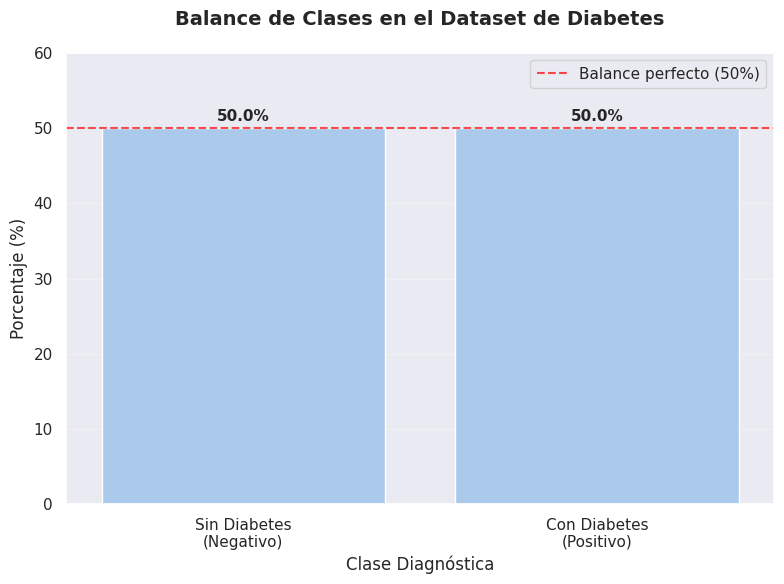


üìà EVALUACI√ìN DEL BALANCE: ‚úÖ Bien balanceado
   ‚Ä¢ Ratio de balance: 1.00


In [18]:
# Mostrar el balance de clases
class_balance = data['diabetes'].value_counts(normalize=True) * 100

print("DATA:", data)

print("üìä AN√ÅLISIS DE BALANCE DE CLASES")
print(f"   ‚Ä¢ Clase 0 (Negativo): {class_balance[0]:.1f}%")
print(f"   ‚Ä¢ Clase 1 (Positivo): {class_balance[1]:.1f}%")
print(f"   ‚Ä¢ Ratio de balance: {class_balance[0]/class_balance[1]:.2f}:1")

# Crear gr√°fico de balance de clases
plt.figure(figsize=(8, 6))

# Generar barplot con colores diferenciados
bars = sns.barplot(x=class_balance.index, y=class_balance.values)

# Personalizar el gr√°fico
plt.title('Balance de Clases en el Dataset de Diabetes',
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Clase Diagn√≥stica', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Configurar etiquetas del eje X m√°s descriptivas
plt.xticks([0, 1], ['Sin Diabetes\n(Negativo)', 'Con Diabetes\n(Positivo)'])

# A√±adir etiquetas de porcentaje sobre las barras
for i, v in enumerate(class_balance.values):
   plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

# A√±adir l√≠nea horizontal para referencia de balance perfecto (50%)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Balance perfecto (50%)')

# Configurar l√≠mites del eje Y y a√±adir grilla
plt.ylim(0, max(class_balance.values) + 10)
plt.grid(True, alpha=0.3, axis='y')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el grado de desbalance
balance_ratio = min(class_balance.values) / max(class_balance.values)
if balance_ratio > 0.8:
   balance_status = "‚úÖ Bien balanceado"
elif balance_ratio > 0.6:
   balance_status = "‚ö†Ô∏è Ligeramente desbalanceado"
else:
   balance_status = "üö® Significativamente desbalanceado"

print(f"\nüìà EVALUACI√ìN DEL BALANCE: {balance_status}")
print(f"   ‚Ä¢ Ratio de balance: {balance_ratio:.2f}")

In [ ]:
# Imprimir estad√≠sticas del balance de clases
print("\nEstad√≠sticas del balance de clases:")
print(f"Clase 0 (Negativo): {class_balance[0]:.1f}%")
print(f"Clase 1 (Positivo): {class_balance[1]:.1f}%")

# Calcular y mostrar estad√≠sticas descriptivas por clase
print("\nEstad√≠sticas descriptivas por clase:")
for feature in feature_names:
    console.rule(f"{feature.upper()}")
    print(data.groupby('diabetes')[feature].describe())


Estad√≠sticas del balance de clases:
Clase 0 (Negativo): 50.0%
Clase 1 (Positivo): 50.0%

Estad√≠sticas descriptivas por clase:


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ AGE ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min      25%       50%       75%  \
diabetes                                                                     
0         221.0 -0.007503  0.046964 -0.107226 -0.04184 -0.001882  0.027178   
1         221.0  0.007503  0.047189 -0.107226 -0.02731  0.012648  0.041708   

               max  
diabetes            
0         0.092564  
1         0.110727  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ SEX ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%      75%  \
diabetes                                                                     
0         221.0 -0.000216  0.047659 -0.044642 -0.044642 -0.044642  0.05068   
1         221.0  0.000216  0.047686 -0.044642 -0.044642 -0.044642  0.05068   

              max  
diabetes           
0         0.05068  
1         0.05068  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ BMI ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count     mean       std       min       25%       50%       75%  \
diabetes                                                                     
0         221.0 -0.02191  0.037701 -0.090275 -0.046085 -0.025607 -0.001895   
1         221.0  0.02191  0.046472 -0.073030 -0.011595  0.018584  0.054152   

               max  
diabetes            
0         0.092953  
1         0.170555  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ BP ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.017406  0.041099 -0.112399 -0.043542 -0.022885  0.008101   
1         221.0  0.017406  0.047409 -0.081413 -0.019442  0.018430  0.052858   

               max  
diabetes            
0         0.104501  
1         0.132044  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S1 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%      75%  \
diabetes                                                                     
0         221.0 -0.007652  0.045817 -0.108893 -0.037344 -0.008449  0.01907   
1         221.0  0.007652  0.048256 -0.126781 -0.024960  0.008063  0.03971   

               max  
diabetes            
0         0.152538  
1         0.153914  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S2 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.006495  0.047133 -0.115613 -0.034508 -0.012900  0.016222   
1         221.0  0.006495  0.047320 -0.112795 -0.027305  0.006202  0.037830   

               max  
diabetes            
0         0.198788  
1         0.155887  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0  0.016497  0.049510 -0.098625 -0.013948  0.011824  0.048640   
1         221.0 -0.016497  0.039338 -0.102307 -0.043401 -0.021311  0.008142   

               max  
diabetes            
0         0.177497  
1         0.181179  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.016897  0.042269 -0.076395 -0.039493 -0.039493 -0.002592   
1         221.0  0.016897  0.046746 -0.076395 -0.002592 -0.002592  0.034309   

               max  
diabetes            
0         0.185234  
1         0.155345  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S5 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.022558  0.040174 -0.126097 -0.049872 -0.025953 -0.000612   
1         221.0  0.022558  0.043694 -0.104366 -0.005142  0.024730  0.049770   

               max  
diabetes            
0         0.132376  
1         0.133597  


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ S6 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.013804  0.042942 -0.137767 -0.042499 -0.013504  0.015491   
1         221.0  0.013804  0.048152 -0.104630 -0.017646  0.007207  0.044485   

               max  
diabetes            
0         0.106617  
1         0.135612  


Forma de los conjuntos de datos:
 - X_train: (353, 10)
 - X_test: (89, 10)
 - y_train: (353,)
 - y_test: (89,)


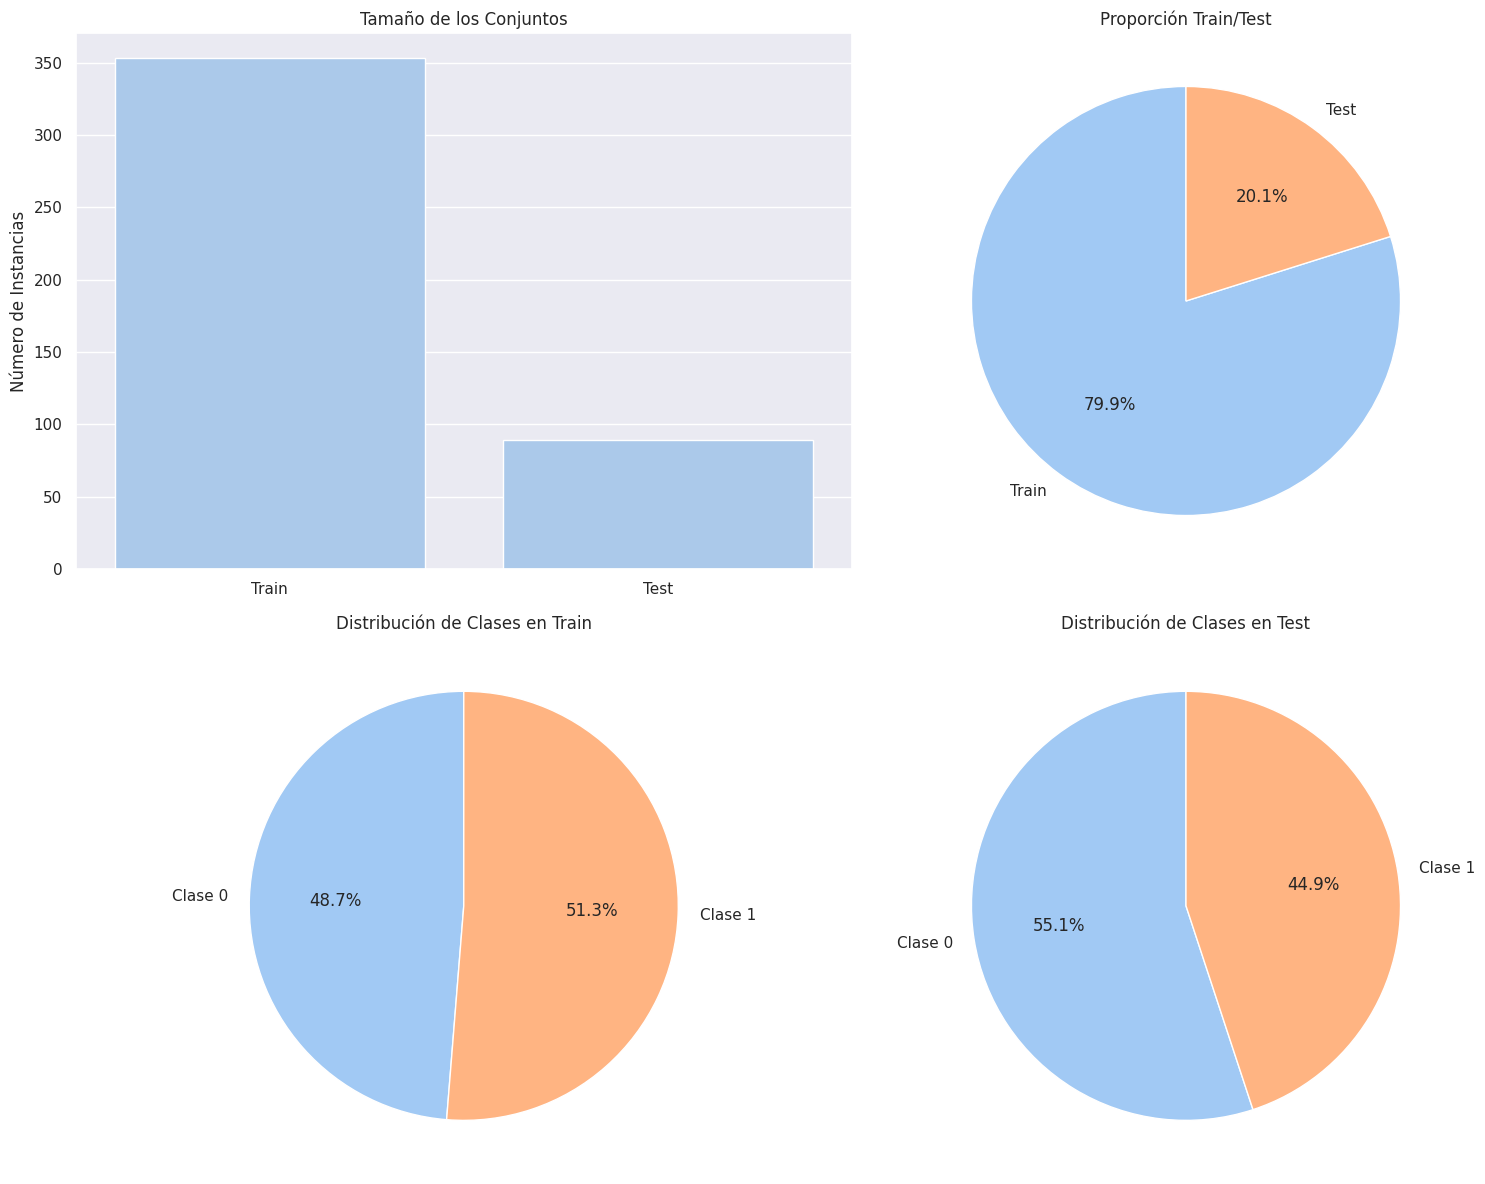


Estad√≠sticas:
Ratio Train/Test: 0.80

Distribuci√≥n de Clases:
Clase 0:
 - Train: 172 (48.7%)
 - Test: 49 (55.1%)
Clase 1:
 - Train: 181 (51.3%)
 - Test: 40 (44.9%)


In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Escalar las caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def visualize_train_test_split(X_train, X_test, y_train, y_test):
    """
    Visualiza la distribuci√≥n de los conjuntos de entrenamiento y prueba,
    incluyendo el tama√±o de los conjuntos y la distribuci√≥n de clases.

    Args:
    X_train, X_test, y_train, y_test: Conjuntos de datos divididos
    """
    plt.figure(figsize=(16, 12))

    # Informaci√≥n textual
    print("Forma de los conjuntos de datos:")
    print(f" - X_train: {X_train.shape}")
    print(f" - X_test: {X_test.shape}")
    print(f" - y_train: {y_train.shape}")
    print(f" - y_test: {y_test.shape}")

    # Tama√±o de los conjuntos
    sizes = {
        'Train': X_train.shape[0],
        'Test': X_test.shape[0]
    }

    # Distribuci√≥n de clases
    train_class_dist = np.bincount(y_train)
    test_class_dist = np.bincount(y_test)

    # Gr√°fico de barras para el tama√±o de los conjuntos
    plt.subplot(2, 2, 1)
    sns.barplot(x=list(sizes.keys()), y=list(sizes.values()))
    plt.title('Tama√±o de los Conjuntos')
    plt.ylabel('N√∫mero de Instancias')

    # Gr√°fico circular para la proporci√≥n Train/Test
    plt.subplot(2, 2, 2)
    plt.pie(sizes.values(), labels=sizes.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Proporci√≥n Train/Test')

    # Gr√°fico de pastel para la distribuci√≥n de clases en Train
    plt.subplot(2, 2, 3)
    plt.pie(train_class_dist, labels=[f'Clase {i}' for i in range(len(train_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribuci√≥n de Clases en Train')

    # Gr√°fico de pastel para la distribuci√≥n de clases en Test
    plt.subplot(2, 2, 4)
    plt.pie(test_class_dist, labels=[f'Clase {i}' for i in range(len(test_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribuci√≥n de Clases en Test')

    plt.tight_layout()
    plt.show()

    # Informaci√≥n adicional
    print("\nEstad√≠sticas:")
    print(f"Ratio Train/Test: {sizes['Train'] / (sizes['Train'] + sizes['Test']):.2f}")
    print("\nDistribuci√≥n de Clases:")
    for i in range(len(train_class_dist)):
        print(f"Clase {i}:")
        print(f" - Train: {train_class_dist[i]} ({train_class_dist[i]/sum(train_class_dist)*100:.1f}%)")
        print(f" - Test: {test_class_dist[i]} ({test_class_dist[i]/sum(test_class_dist)*100:.1f}%)")


visualize_train_test_split(X_train, X_test, y_train, y_test)

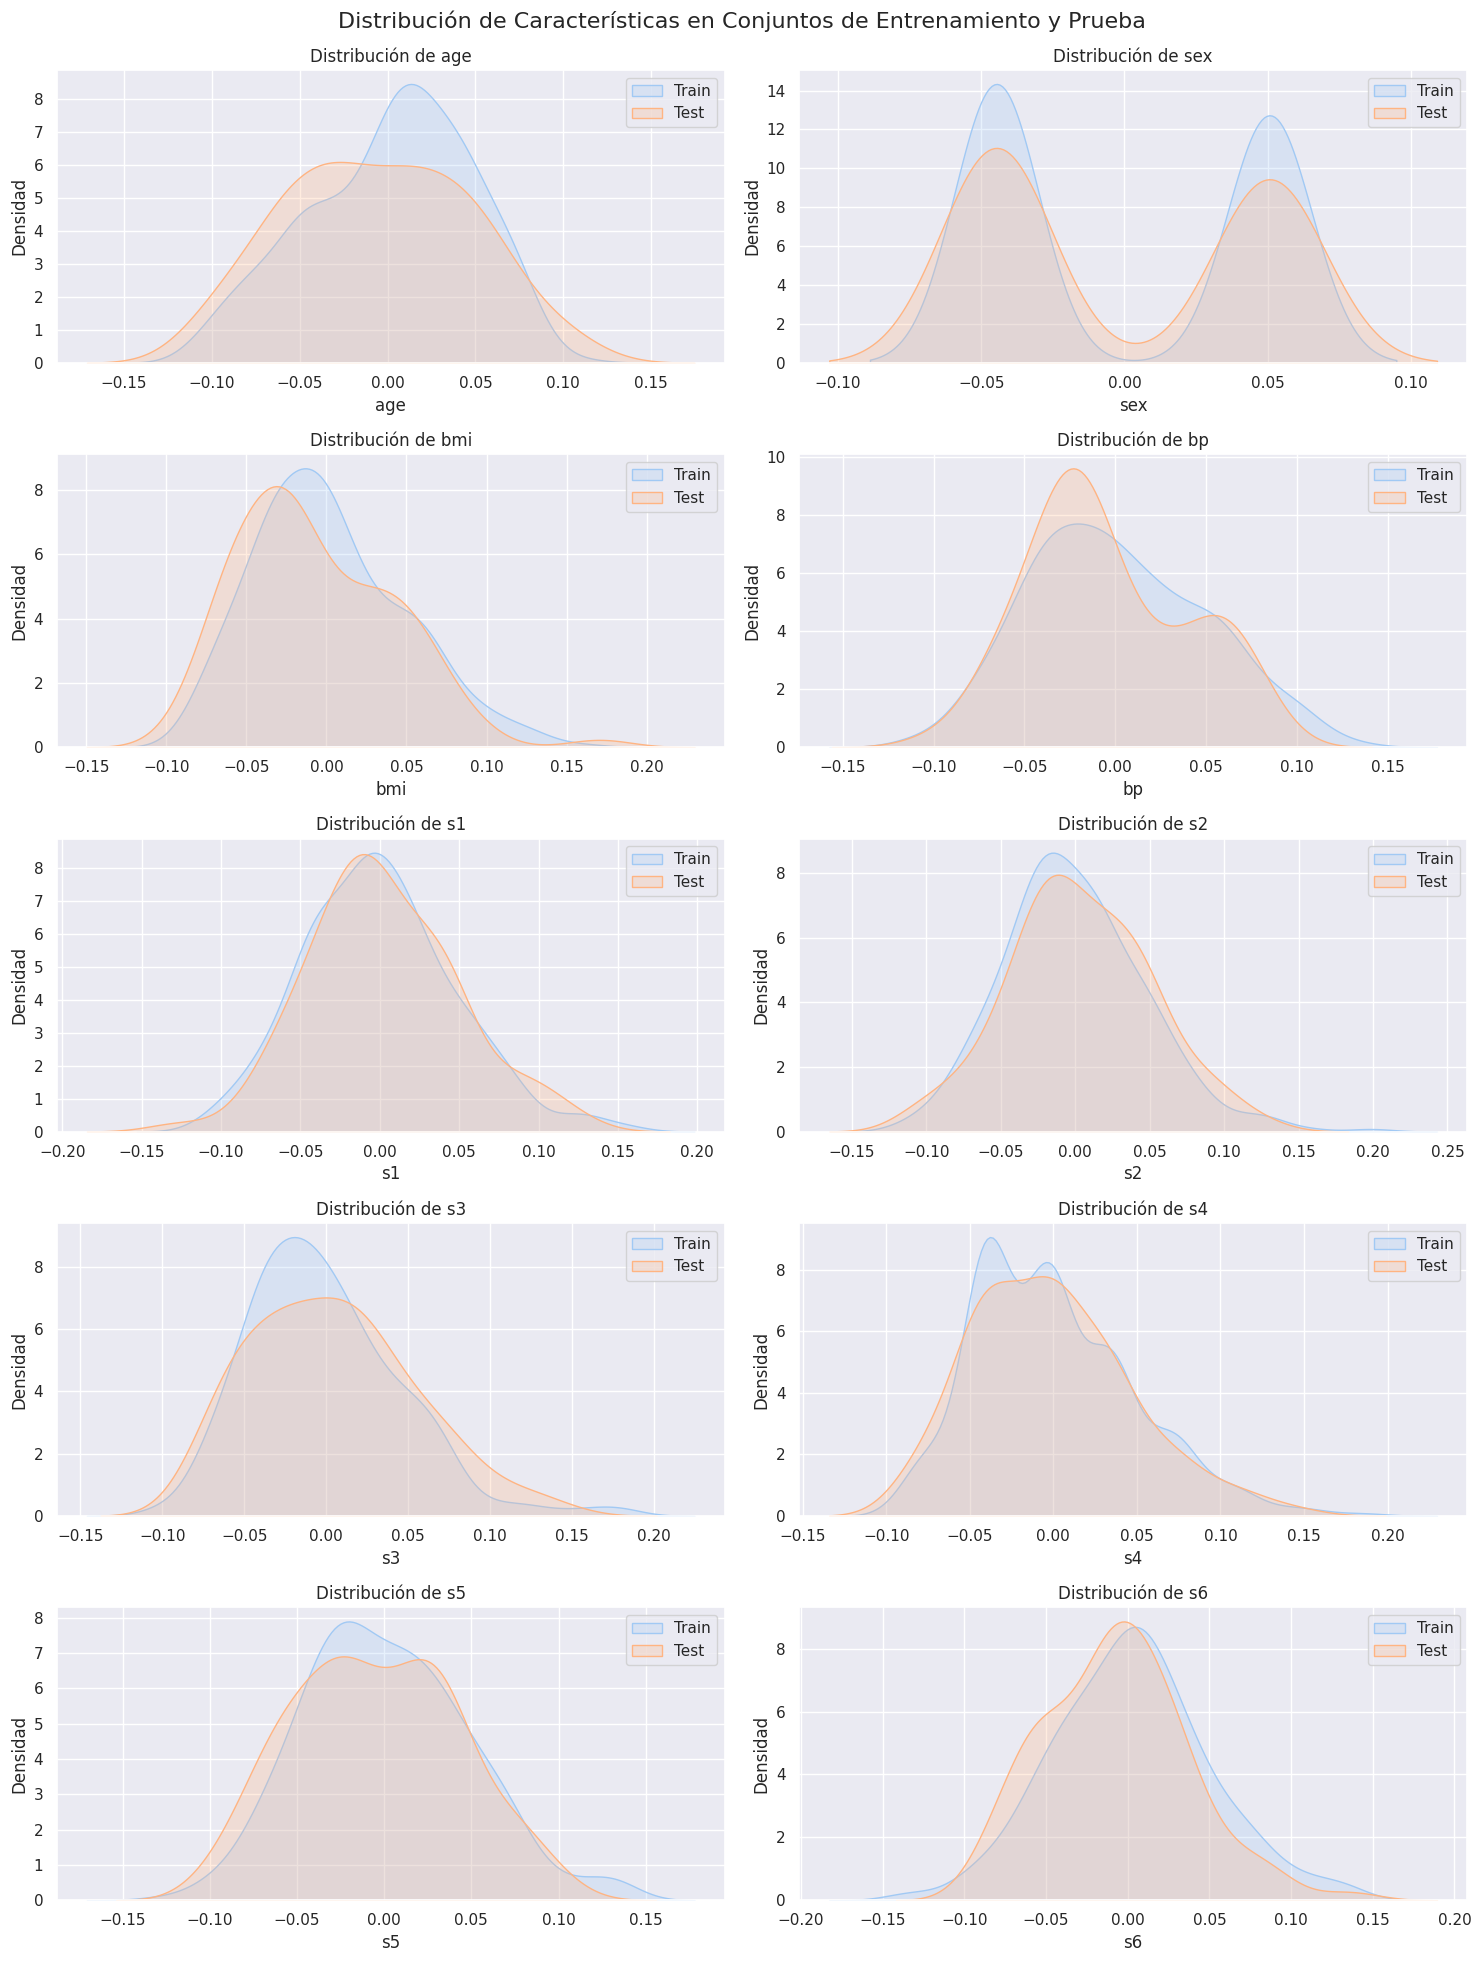

In [22]:
def visualize_train_test_distributions_for_features(X_train, X_test, feature_names):
    """
    Visualiza la distribuci√≥n de caracter√≠sticas en los conjuntos de entrenamiento y prueba.

    Args:
    X_train (numpy.ndarray): Conjunto de datos de entrenamiento
    X_test (numpy.ndarray): Conjunto de datos de prueba
    feature_names (list): Lista de nombres de las caracter√≠sticas
    """
    n_features = X_train.shape[1]
    n_rows = (n_features + 1) // 2  # Calcula el n√∫mero de filas necesarias

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
    fig.suptitle('Distribuci√≥n de Caracter√≠sticas en Conjuntos de Entrenamiento y Prueba', fontsize=16)

    for i, feature in enumerate(feature_names):
        row = i // 2
        col = i % 2
        ax = axes[row, col] if n_rows > 1 else axes[col]

        sns.kdeplot(X_train[:, i], ax=ax, label='Train', fill=True)
        sns.kdeplot(X_test[:, i], ax=ax, label='Test', fill=True)

        ax.set_title(f'Distribuci√≥n de {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Densidad')
        ax.legend()

    # Si el n√∫mero de caracter√≠sticas es impar, elimina el √∫ltimo subplot vac√≠o
    if n_features % 2 != 0:
        fig.delaxes(axes[-1, -1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Ajusta el espacio para el t√≠tulo principal
    plt.show()

visualize_train_test_distributions_for_features(X_train, X_test, feature_names)

üå≥ ENTRENANDO MODELO RANDOM FOREST
‚úÖ Modelo entrenado exitosamente
   ‚Ä¢ Estimadores: 100
   ‚Ä¢ Caracter√≠sticas utilizadas: 10
   ‚Ä¢ Muestras de entrenamiento: 353

üîÆ GENERANDO PREDICCIONES
   ‚Ä¢ Predicciones generadas: 89
   ‚Ä¢ Muestras de prueba: 89

üìä RESULTADOS DE LA MATRIZ DE CONFUSI√ìN:
   ‚Ä¢ Verdaderos Negativos (TN): 37
   ‚Ä¢ Falsos Positivos (FP): 12
   ‚Ä¢ Falsos Negativos (FN): 13
   ‚Ä¢ Verdaderos Positivos (TP): 27


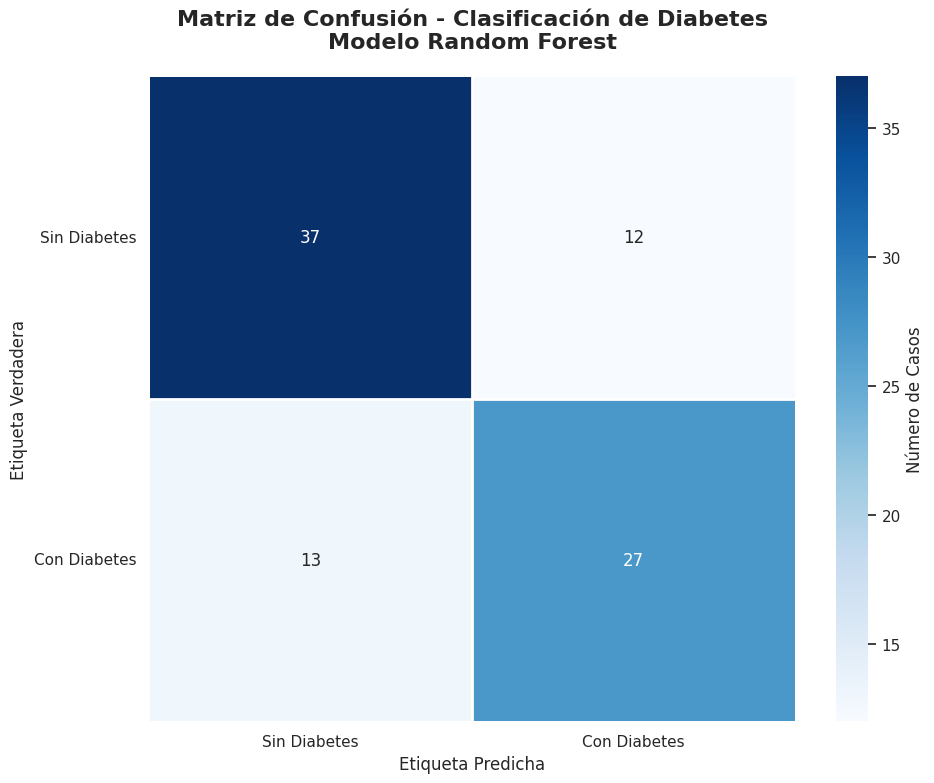


üìà M√âTRICAS DE RENDIMIENTO:
   ‚Ä¢ Exactitud (Accuracy): 0.719
   ‚Ä¢ Precisi√≥n (Precision): 0.692
   ‚Ä¢ Sensibilidad (Recall): 0.675
   ‚Ä¢ F1-Score: 0.684


In [26]:
# Entrenar un modelo de Random Forest
print("üå≥ ENTRENANDO MODELO RANDOM FOREST")
print("=" * 40)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

print(f"‚úÖ Modelo entrenado exitosamente")
print(f"   ‚Ä¢ Estimadores: {rf_model.n_estimators}")
print(f"   ‚Ä¢ Caracter√≠sticas utilizadas: {X_train_scaled.shape[1]}")
print(f"   ‚Ä¢ Muestras de entrenamiento: {X_train_scaled.shape[0]}")

# Realizar predicciones en el conjunto de prueba
print(f"\nüîÆ GENERANDO PREDICCIONES")
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"   ‚Ä¢ Predicciones generadas: {len(y_pred)}")
print(f"   ‚Ä¢ Muestras de prueba: {len(y_test)}")

# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Mostrar estad√≠sticas b√°sicas de la matriz de confusi√≥n
tn, fp, fn, tp = cm.ravel()
print(f"\nüìä RESULTADOS DE LA MATRIZ DE CONFUSI√ìN:")
print(f"   ‚Ä¢ Verdaderos Negativos (TN): {tn}")
print(f"   ‚Ä¢ Falsos Positivos (FP): {fp}")
print(f"   ‚Ä¢ Falsos Negativos (FN): {fn}")
print(f"   ‚Ä¢ Verdaderos Positivos (TP): {tp}")

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(10, 8))

# Crear heatmap con anotaciones mejoradas
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            square=True, linewidths=0.5,
            cbar_kws={'label': 'N√∫mero de Casos'})


# Personalizar el gr√°fico
plt.title('Matriz de Confusi√≥n - Clasificaci√≥n de Diabetes\nModelo Random Forest',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)

# Configurar etiquetas de los ejes
plt.xticks([0.5, 1.5], ['Sin Diabetes', 'Con Diabetes'], fontsize=11)
plt.yticks([0.5, 1.5], ['Sin Diabetes', 'Con Diabetes'], fontsize=11, rotation=0)

# A√±adir l√≠neas divisorias m√°s marcadas
plt.axhline(y=1, color='white', linewidth=2)
plt.axvline(x=1, color='white', linewidth=2)

plt.tight_layout()
plt.show()

# Calcular m√©tricas adicionales
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nüìà M√âTRICAS DE RENDIMIENTO:")
print(f"   ‚Ä¢ Exactitud (Accuracy): {accuracy:.3f}")
print(f"   ‚Ä¢ Precisi√≥n (Precision): {precision:.3f}")
print(f"   ‚Ä¢ Sensibilidad (Recall): {recall:.3f}")
print(f"   ‚Ä¢ F1-Score: {f1_score:.3f}")


üìã INFORME DETALLADO DE CLASIFICACI√ìN
              precision    recall  f1-score   support

Sin Diabetes      0.740     0.755     0.747        49
Con Diabetes      0.692     0.675     0.684        40

    accuracy                          0.719        89
   macro avg      0.716     0.715     0.716        89
weighted avg      0.719     0.719     0.719        89


üìä GENERANDO CURVA ROC
   ‚Ä¢ AUC Score: 0.812
   ‚Ä¢ Puntos en la curva: 42


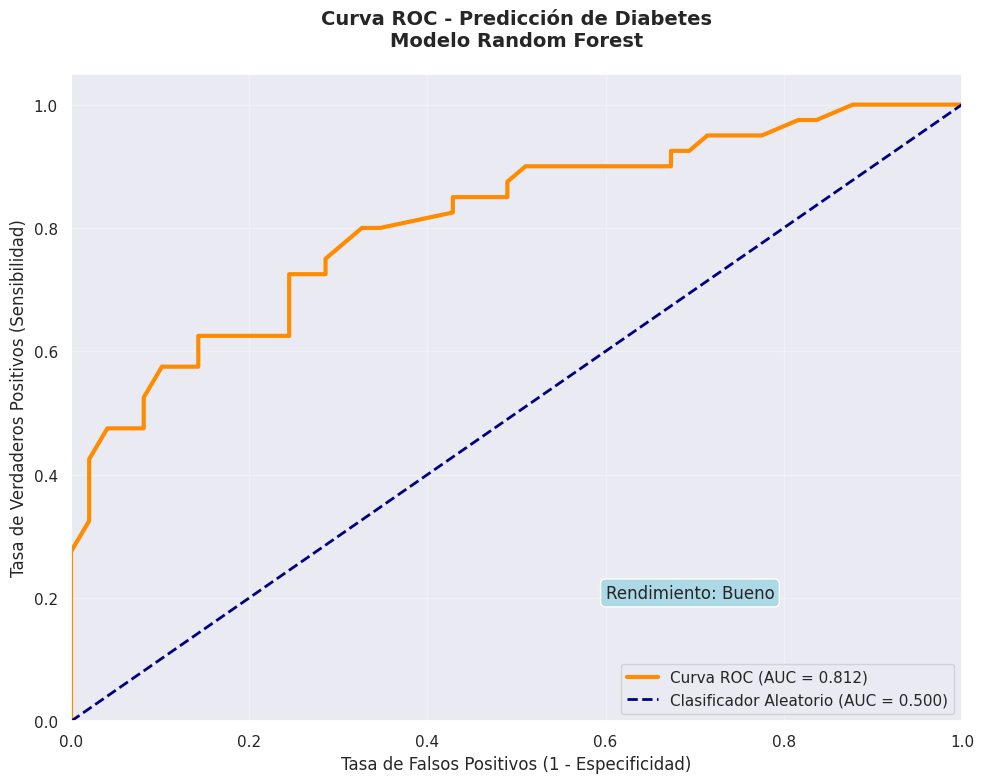

In [28]:
# Imprimir el informe de clasificaci√≥n
print("üìã INFORME DETALLADO DE CLASIFICACI√ìN")
print("=" * 50)
print(classification_report(y_test, y_pred,
                         target_names=['Sin Diabetes', 'Con Diabetes'],
                         digits=3))

# Calcular y visualizar la curva ROC
print("\nüìä GENERANDO CURVA ROC")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"   ‚Ä¢ AUC Score: {roc_auc:.3f}")
print(f"   ‚Ä¢ Puntos en la curva: {len(fpr)}")

# Crear gr√°fico de la curva ROC
plt.figure(figsize=(10, 8))

# Plotear la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=3,
        label=f'Curva ROC (AUC = {roc_auc:.3f})')

# L√≠nea diagonal de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
        label='Clasificador Aleatorio (AUC = 0.500)')

# Configurar l√≠mites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curva ROC - Predicci√≥n de Diabetes\nModelo Random Forest',
         fontsize=14, fontweight='bold', pad=20)

# Personalizar leyenda y grilla
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)


plt.text(0.6, 0.2, f'Rendimiento: {auc_interpretation}',
        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()


In [32]:
# Calcular m√©tricas espec√≠ficas
print("üîç C√ÅLCULO DE M√âTRICAS DE RENDIMIENTO CL√çNICO")
print("=" * 55)

tn, fp, fn, tp = cm.ravel()

# Calcular m√©tricas con manejo de divisi√≥n por cero
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# Mostrar m√©tricas num√©ricas
print(f"üìä M√âTRICAS PRINCIPALES:")
print(f"   ‚Ä¢ Precisi√≥n (Precision):     {precision:.3f}")
print(f"   ‚Ä¢ Sensibilidad (Recall):     {sensitivity:.3f}")
print(f"   ‚Ä¢ Especificidad:             {specificity:.3f}")
print(f"   ‚Ä¢ F1-Score:                  {f1_score:.3f}")
print(f"   ‚Ä¢ AUC-ROC:                   {roc_auc:.3f}")

# Interpretaci√≥n cl√≠nica detallada
print(f"\nüè• INTERPRETACI√ìN CL√çNICA:")
print(f"   ‚Ä¢ El modelo identifica correctamente el {sensitivity*100:.1f}% de los casos ")
print(f"     positivos de diabetes (sensibilidad).")
print(f"   ‚Ä¢ De los casos que el modelo predice como diabetes positivo, ")
print(f"     el {precision*100:.1f}% son realmente positivos (precisi√≥n).")
print(f"   ‚Ä¢ El modelo identifica correctamente el {specificity*100:.1f}% de los casos ")
print(f"     negativos de diabetes (especificidad).")
print(f"   ‚Ä¢ El F1-Score de {f1_score:.3f} indica el balance entre precisi√≥n y sensibilidad.")
print(f"   ‚Ä¢ El AUC-ROC de {roc_auc:.3f} sugiere la capacidad discriminativa del modelo ")
print(f"     para la diabetes.")

# Evaluaci√≥n del rendimiento cl√≠nico
print(f"\n‚öïÔ∏è EVALUACI√ìN DEL RENDIMIENTO CL√çNICO:")

# Evaluar sensibilidad (cr√≠tica para diagn√≥stico m√©dico)
if sensitivity >= 0.9:
   sens_eval = "‚úÖ Excelente - Muy pocos casos positivos sin detectar"
elif sensitivity >= 0.8:
   sens_eval = "üü¢ Buena - Detecci√≥n aceptable de casos positivos"
elif sensitivity >= 0.7:
   sens_eval = "üü° Moderada - Algunos casos positivos pueden no detectarse"
else:
   sens_eval = "üî¥ Baja - Riesgo alto de casos positivos sin diagnosticar"

# Evaluar especificidad (importante para evitar falsos positivos)
if specificity >= 0.9:
   spec_eval = "‚úÖ Excelente - Muy pocos falsos positivos"
elif specificity >= 0.8:
   spec_eval = "üü¢ Buena - Falsos positivos controlados"
elif specificity >= 0.7:
   spec_eval = "üü° Moderada - Algunos falsos positivos"
else:
   spec_eval = "üî¥ Baja - Muchos falsos positivos"

print(f"   ‚Ä¢ Sensibilidad: {sens_eval}")
print(f"   ‚Ä¢ Especificidad: {spec_eval}")

# Recomendaciones cl√≠nicas
print(f"\nüí° RECOMENDACIONES:")
if sensitivity < 0.8:
   print(f"   ‚ö†Ô∏è  Considerar ajustar el umbral de decisi√≥n para aumentar sensibilidad")
if specificity < 0.8:
   print(f"   ‚ö†Ô∏è  Evaluar el costo de falsos positivos en el contexto cl√≠nico")
if f1_score < 0.7:
   print(f"   ‚ö†Ô∏è  El modelo podr√≠a beneficiarse de m√°s datos de entrenamiento")

üîç C√ÅLCULO DE M√âTRICAS DE RENDIMIENTO CL√çNICO
üìä M√âTRICAS PRINCIPALES:
   ‚Ä¢ Precisi√≥n (Precision):     0.692
   ‚Ä¢ Sensibilidad (Recall):     0.675
   ‚Ä¢ Especificidad:             0.755
   ‚Ä¢ F1-Score:                  0.684
   ‚Ä¢ AUC-ROC:                   0.812

üè• INTERPRETACI√ìN CL√çNICA:
   ‚Ä¢ El modelo identifica correctamente el 67.5% de los casos 
     positivos de diabetes (sensibilidad).
   ‚Ä¢ De los casos que el modelo predice como diabetes positivo, 
     el 69.2% son realmente positivos (precisi√≥n).
   ‚Ä¢ El modelo identifica correctamente el 75.5% de los casos 
     negativos de diabetes (especificidad).
   ‚Ä¢ El F1-Score de 0.684 indica el balance entre precisi√≥n y sensibilidad.
   ‚Ä¢ El AUC-ROC de 0.812 sugiere la capacidad discriminativa del modelo 
     para la diabetes.

‚öïÔ∏è EVALUACI√ìN DEL RENDIMIENTO CL√çNICO:
   ‚Ä¢ Sensibilidad: üî¥ Baja - Riesgo alto de casos positivos sin diagnosticar
   ‚Ä¢ Especificidad: üü° Moderada - Algunos fa

---

# Interpretaci√≥n de los resultados:
* El modelo identifica correctamente el 67.5% de los casos positivos de diabetes (sensibilidad).
* De los casos que el modelo predice como diabetes positivo, el 69.2% son realmente positivos (precisi√≥n).
* El modelo identifica correctamente el 75.5% de los casos negativos de diabetes (especificidad).
* El F1-Score de 0.68 indica un balance entre precisi√≥n y sensibilidad.
* El AUC-ROC de 0.81 sugiere la capacidad discriminativa del modelo para la diabetes.

## Conclusiones

1. **Rendimiento General**:
   - El modelo muestra un rendimiento moderado en la predicci√≥n de diabetes, con un AUC-ROC de 0.81, lo que indica una capacidad discriminativa buena, aunque no excelente.

2. **Balance entre Sensibilidad y Especificidad**:
   - La sensibilidad (67.5%) y la especificidad (75.5%) est√°n relativamente equilibradas, con un ligero sesgo hacia la identificaci√≥n correcta de casos negativos.
   - Este balance sugiere que el modelo es algo m√°s conservador en la predicci√≥n de casos positivos.

3. **F1-Score**:
   - El F1-Score de 0.68 confirma un equilibrio razonable entre precisi√≥n y sensibilidad, aunque hay margen de mejora.

## Sugerencias de Mejora (generales)

1. **Ajuste del Umbral de Clasificaci√≥n**:
   - Experimentar con diferentes umbrales de clasificaci√≥n para encontrar un mejor balance entre sensibilidad y especificidad, especialmente si se prioriza la detecci√≥n de casos positivos.

2. **Ingenier√≠a de Caracter√≠sticas**:
   - Crear nuevas caracter√≠sticas o transformar las existentes para capturar mejor los patrones predictivos de la diabetes.

3. **Aumento de Datos**:
   - Si el conjunto de datos es peque√±o, considerar t√©cnicas de aumento de datos para mejorar la generalizaci√≥n del modelo.

4. **Manejo de Desbalance de Clases**:
   - Si existe un desbalance significativo entre las clases, considerar t√©cnicas como SMOTE para sobremuestrear la clase minoritaria.

5. **Validaci√≥n Cruzada**:
   - Utilizar validaci√≥n cruzada para obtener una estimaci√≥n m√°s robusta del rendimiento del modelo y evitar el sobreajuste.

6. **Incorporaci√≥n de Conocimiento M√©dico**:
   - Consultar con expertos en diabetes para incorporar conocimiento domain-specific en la selecci√≥n y creaci√≥n de caracter√≠sticas.

7. **An√°lisis de Errores**:
   - Realizar un an√°lisis detallado de los casos mal clasificados para identificar patrones o subgrupos donde el modelo tiene un peor desempe√±o.

8. **Recopilaci√≥n de M√°s Datos**:
    - Si es posible, recopilar m√°s datos o incorporar fuentes de datos adicionales para enriquecer el conjunto de entrenamiento.

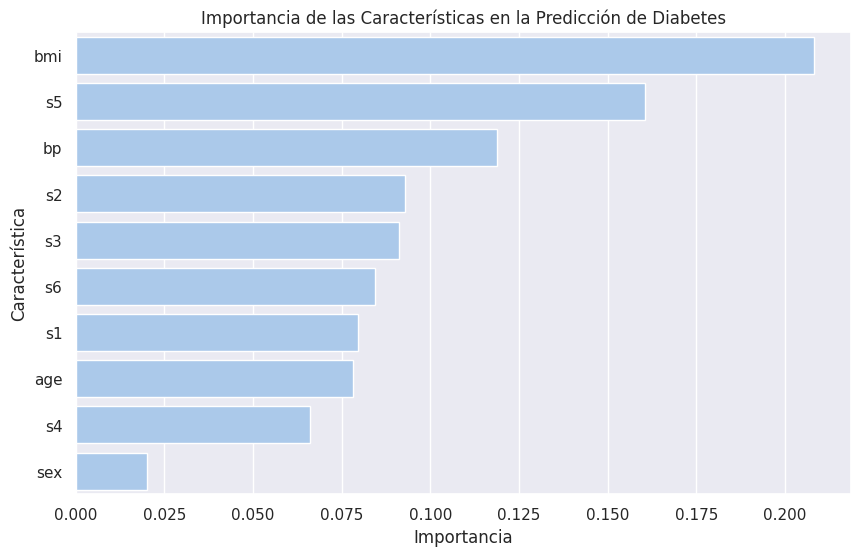


Importancia de las Caracter√≠sticas:
  feature  importance
2     bmi    0.208086
8      s5    0.160413
3      bp    0.118684
5      s2    0.092859
6      s3    0.091283
9      s6    0.084323
4      s1    0.079738
0     age    0.078318
7      s4    0.066106
1     sex    0.020190


In [ ]:
# Importancia de las caracter√≠sticas
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Caracter√≠sticas en la Predicci√≥n de Diabetes')
plt.xlabel('Importancia')
plt.ylabel('Caracter√≠stica')
plt.show()

print("\nImportancia de las Caracter√≠sticas:")
print(feature_importance)

# An√°lisis de la Distribuci√≥n de Probabilidades:
La distribuci√≥n de probabilidades predichas puede ayudar a entender c√≥mo el modelo est√° clasificando los casos. Una distribuci√≥n bimodal podr√≠a indicar una buena separaci√≥n entre clases. Si la distribuci√≥n est√° sesgada hacia un extremo, podr√≠a ser necesario ajustar el umbral de clasificaci√≥n.

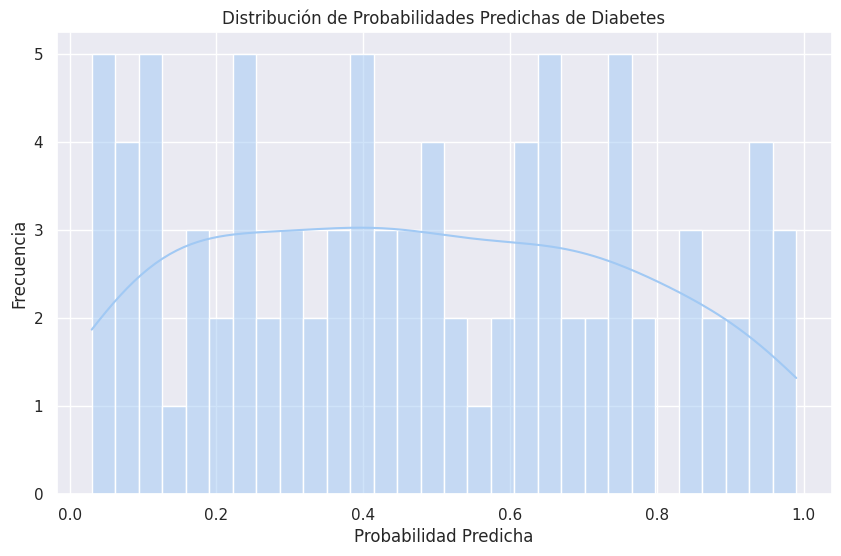

In [ ]:
# An√°lisis adicional: Distribuci√≥n de probabilidades predichas
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=30, kde=True)
plt.title('Distribuci√≥n de Probabilidades Predichas de Diabetes')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.show()

# Comentario final sobre la interpretaci√≥n en el contexto de diabetes

Interpretaci√≥n en el Contexto de Diabetes:

- La sensibilidad es crucial para identificar correctamente a los pacientes con riesgo de diabetes.
- La especificidad ayuda a evitar falsos positivos que podr√≠an llevar a pruebas o tratamientos innecesarios.
- El balance entre sensibilidad y especificidad debe ajustarse seg√∫n las consecuencias de los falsos positivos vs. falsos negativos en el contexto de la diabetes.
- La importancia de las caracter√≠sticas puede guiar a los m√©dicos sobre qu√© factores son m√°s relevantes para el riesgo de diabetes, lo que puede ser √∫til para la prevenci√≥n y el manejo de la enfermedad.
- Este modelo podr√≠a ser √∫til como una herramienta de screening inicial, pero no debe reemplazar el diagn√≥stico m√©dico profesional.
- Dada la naturaleza cr√≠tica de la detecci√≥n de diabetes, se podr√≠a considerar ajustar el modelo para favorecer una mayor sensibilidad, aceptando un posible aumento en los falsos positivos que pueden ser descartados en ex√°menes posteriores.

Finalmente: Es crucial validar cualquier mejora del modelo (actualizaciones) con datos de prueba independientes y, en √∫ltima instancia, en un entorno cl√≠nico real antes de su implementaci√≥n.